In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [89]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [90]:
# drop rows
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [91]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [92]:
#Stripping the names of the columns
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [93]:
#Stripping the Classes Features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [94]:
#displaying first 5 rows of dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [95]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)

In [96]:
#displaying the shape of dataset : No. of rows and No. of columns
df.shape


(244, 15)

In [97]:
#getting overall statistics about the dataframe
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000,244.000000,244,243,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,NaN,NaN,127,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,0.4,fire,bejaia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,12,137,122
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,NaN,4.774180,16.664754,NaN,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,NaN,4.175318,14.204824,NaN,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,NaN,0.000000,1.100000,NaN,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,NaN,1.400000,6.000000,NaN,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,NaN,3.500000,12.250000,NaN,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,NaN,7.300000,22.525000,NaN,NaN,NaN


In [98]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [99]:
df.rename(columns={'Rain ': 'Rain', 'Classes  ': 'classes'}, inplace=True)

In [100]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            127
Classes          2
region           2
dtype: int64

In [101]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [102]:
df['DC']=LabelEncoder.fit_transform(df['DC'])
df['FWI']=LabelEncoder.fit_transform(df['FWI'])
df['region']=LabelEncoder.fit_transform(df['region'])

In [103]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,150,1.3,3.4,5,not fire,1
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,150,1.0,3.9,4,not fire,1
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,146,0.3,2.7,1,not fire,1
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,136,0.0,1.7,0,not fire,1
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,18,1.2,3.9,5,not fire,1


In [104]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [105]:
df = df.drop(['year', 'Classes'], axis=1)

In [106]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,29,57,18.0,0.0,65.7,3.4,150,1.3,3.4,5,1
1,2,6,29,61,13.0,1.3,64.4,4.1,150,1.0,3.9,4,1
2,3,6,26,82,22.0,13.1,47.1,2.5,146,0.3,2.7,1,1
3,4,6,25,89,13.0,2.5,28.6,1.3,136,0.0,1.7,0,1
4,5,6,27,77,16.0,0.0,64.8,3.0,18,1.2,3.9,5,1


In [107]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [108]:
numeric_features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region']

C:\Users\Lab3\AppData\Local\Temp\ipykernel_17376\2739071407.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
C:\Users\Lab3\AppData\Local\Temp\ipykernel_17376\2739071407.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
C:\Users\Lab3\AppData\Local\Temp\ipykernel_17376\2739071407.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
C:\Users\Lab3\AppData\Local\Temp\ipykernel_17376\2739071407.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=Tr

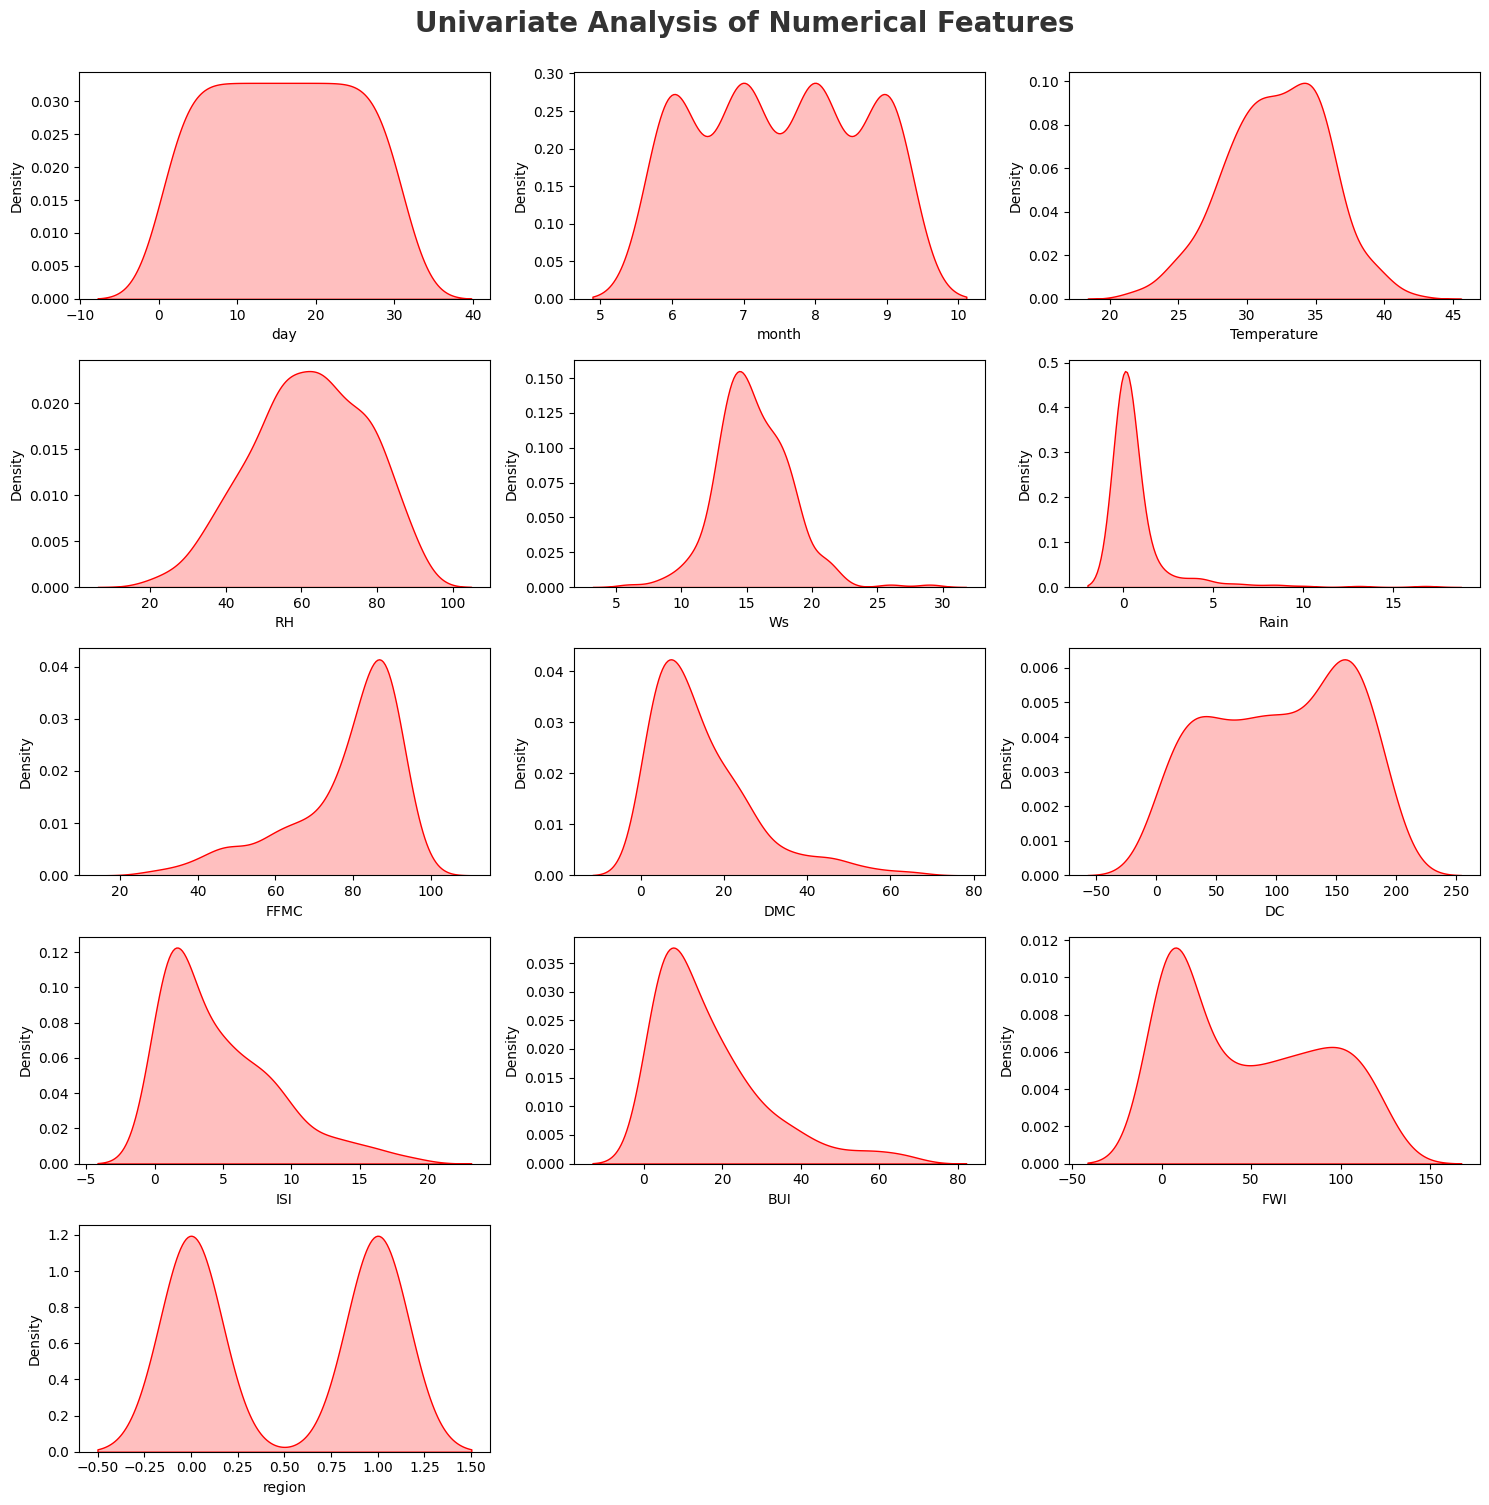

In [109]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

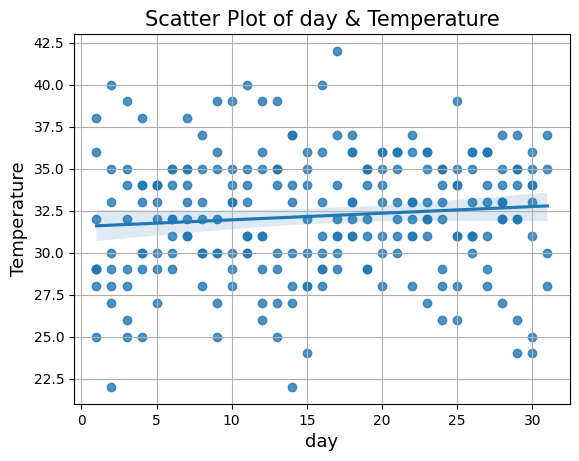

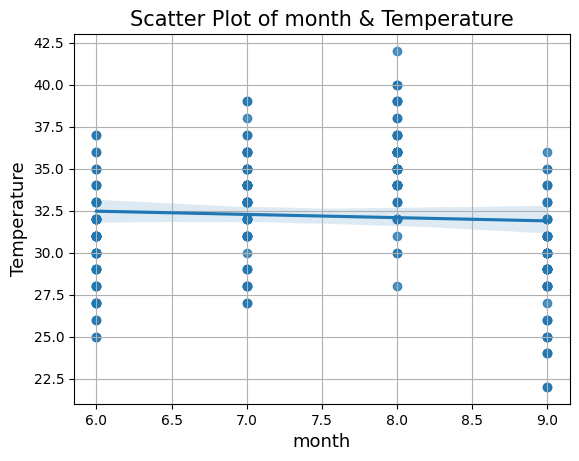

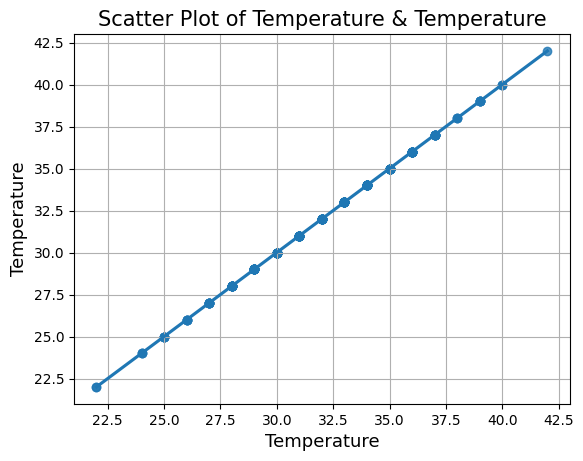

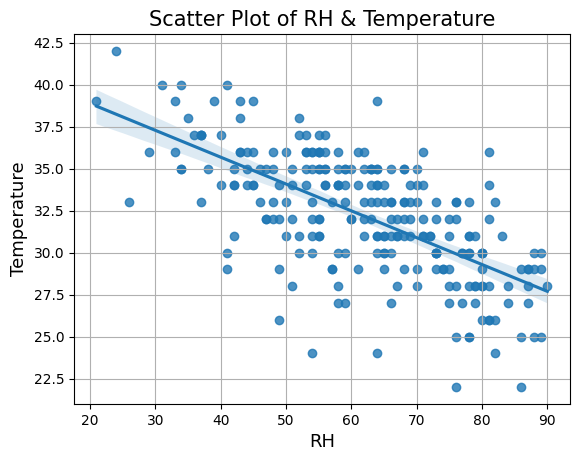

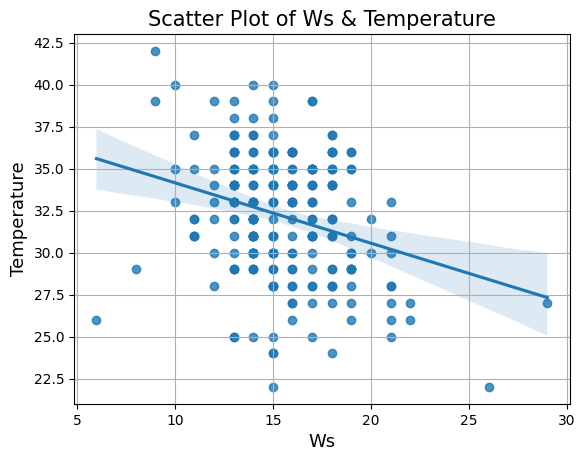

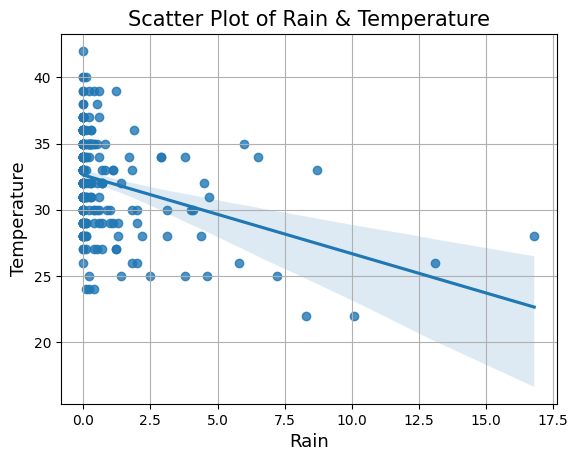

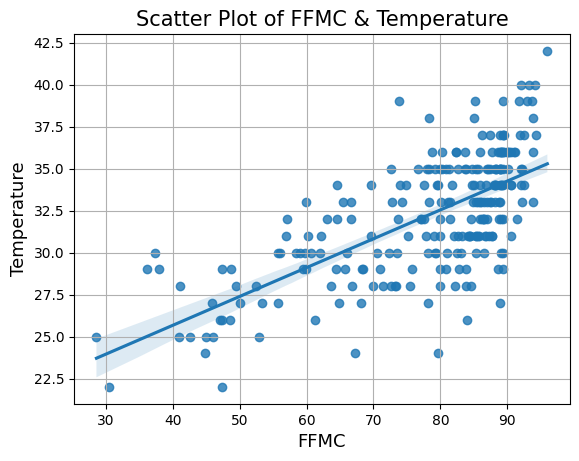

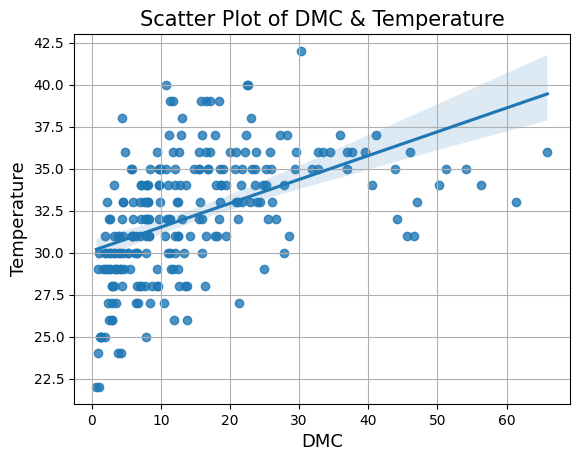

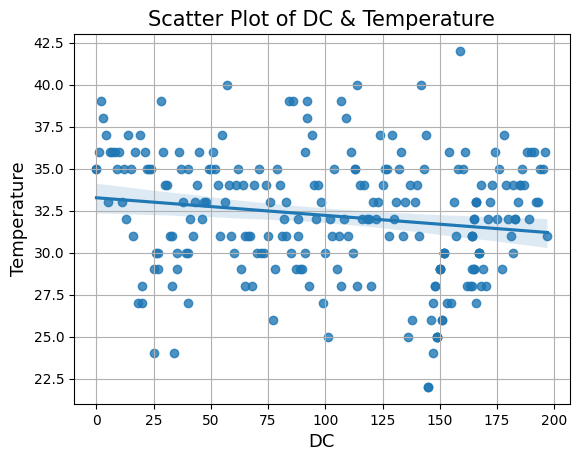

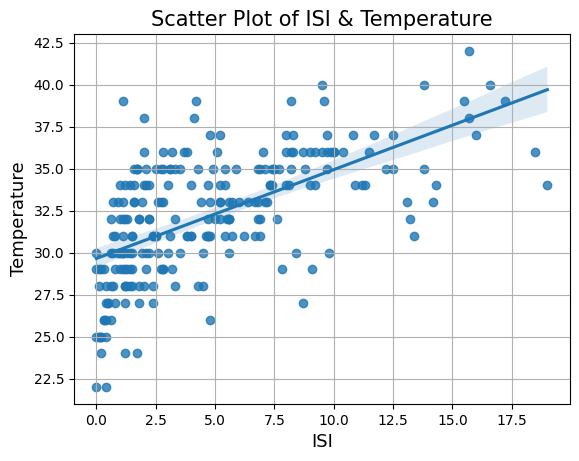

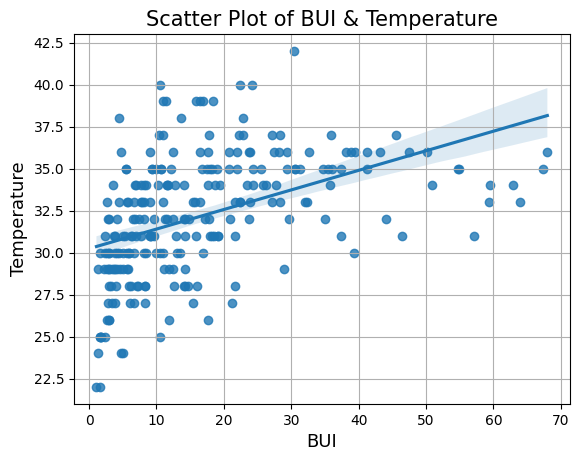

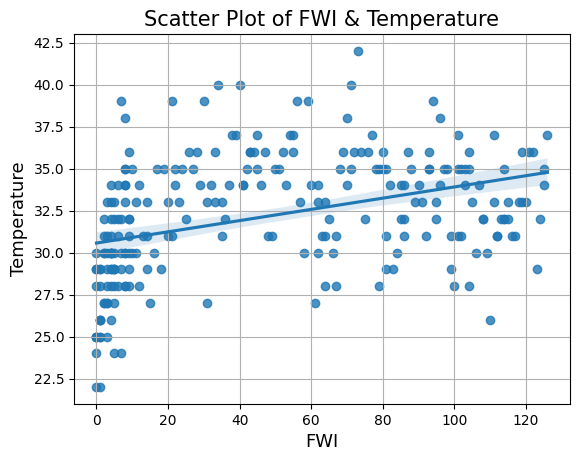

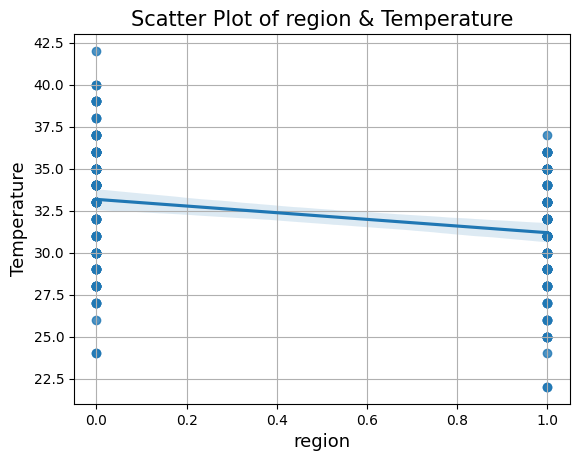

In [110]:
x_axis = numeric_features
y = "Temperature"

for col in x_axis:
    sns.regplot(x = col, y = y, data = df)
    plt.xlabel(col, fontsize = 13)
    plt.ylabel(y, fontsize = 13)
    plt.title("Scatter Plot of " + col + " & " + y, fontsize = 15)
    plt.grid()
    plt.show()

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'Ws'}>, <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>, <Axes: title={'center': 'FWI'}>],
       [<Axes: title={'center': 'region'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

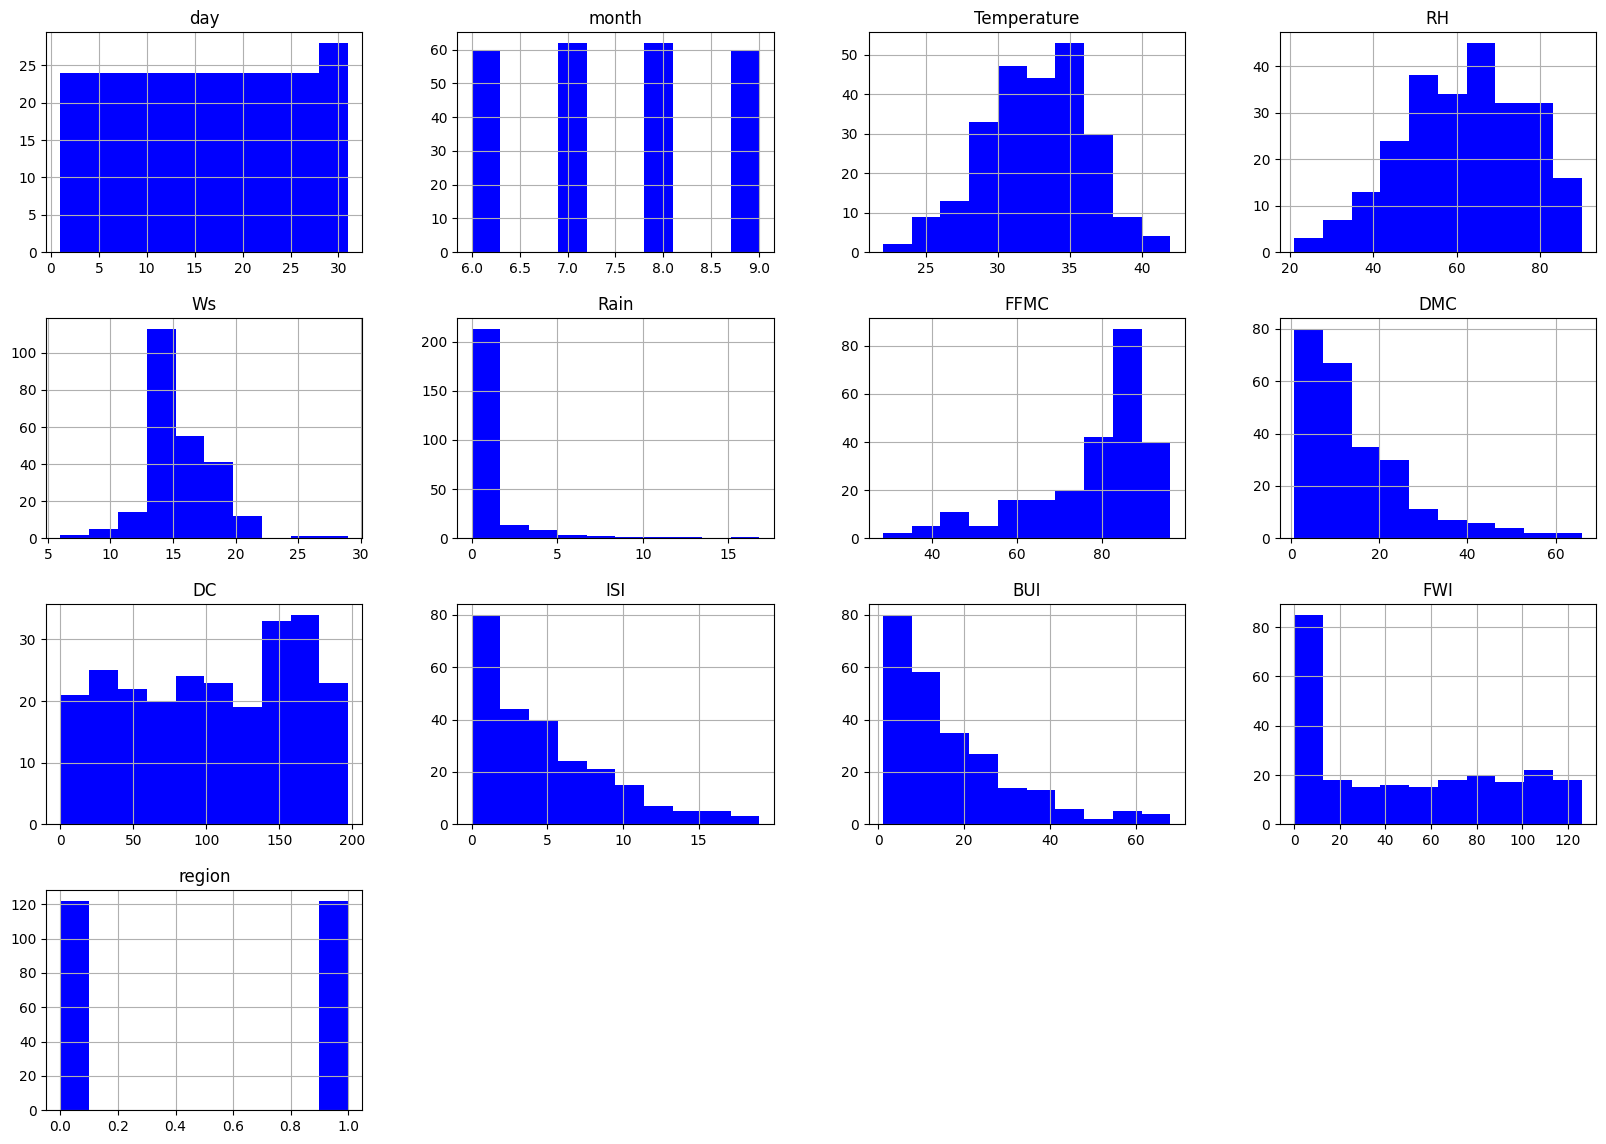

In [111]:
df.hist(figsize=(20,14),color='b')

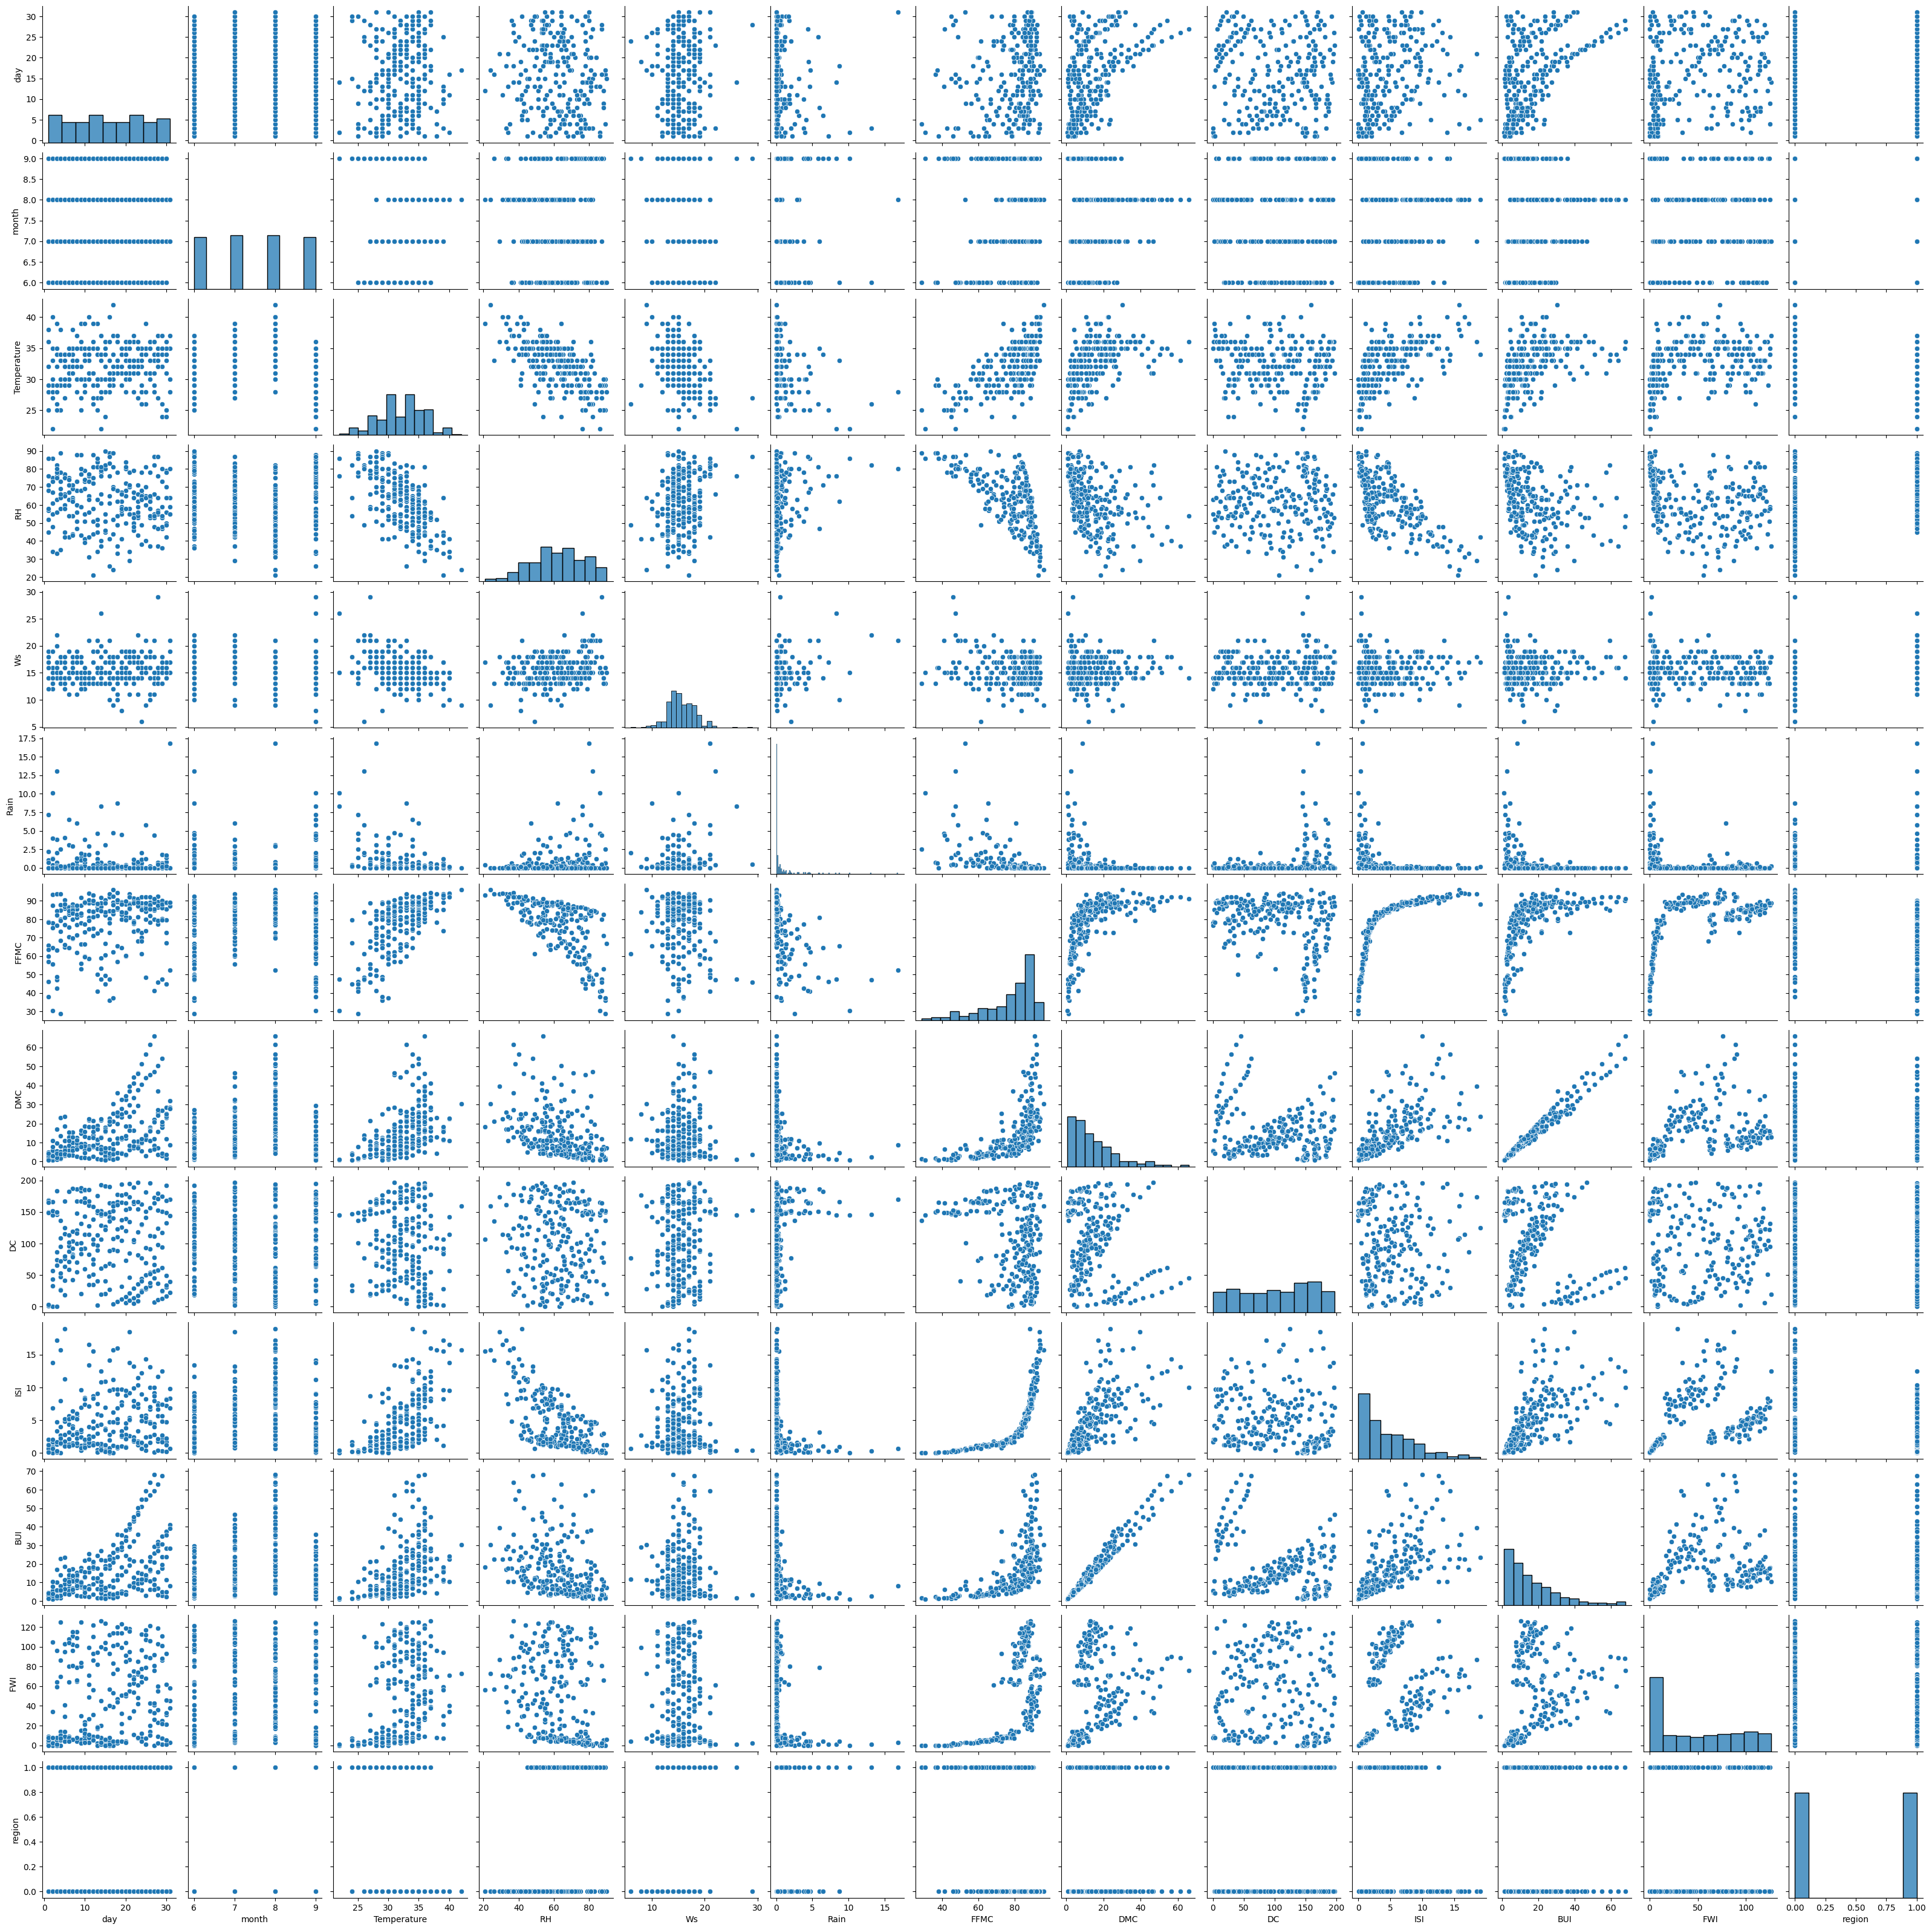

In [112]:
sns.pairplot(df)

In [113]:
## Independent Features

x=pd.DataFrame(df, columns=['RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])  

## Dependent Features

y=pd.DataFrame(df,columns=['Temperature'])

In [114]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.33,random_state=10)

In [115]:
x_train.shape

(163, 10)

In [116]:
x_test.shape

(81, 10)

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()  ## Initialising

In [118]:
x_train=scaler.fit_transform(x_train)

In [119]:
x_test=scaler.transform(x_test)

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
regression=LinearRegression()
regression
regression.fit(x_train,y_train)

LinearRegression()

In [122]:
## print the coefficients
print(regression.coef_)

[[-1.27500995 -0.53842199 -0.21205266  0.70886534 -1.02729123 -0.32455869
   0.2501139   1.35400654  0.21687466 -0.23115864]]


In [123]:
## print the intercept
print(regression.intercept_)

[32.17791411]


In [124]:
## prediction for the test data
reg_pred = regression.predict(x_test)

Text(0, 0.5, 'Test Predicted Data')

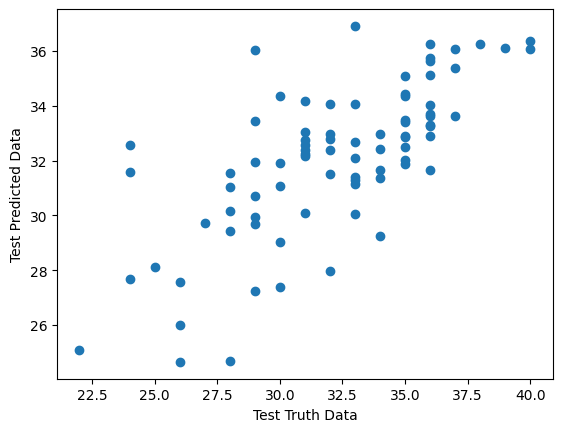

In [125]:
## Assumptions of Linear Regression

plt.scatter(y_test, reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [128]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("The Perfromance Metrics: \n")
print("MSE:-",mean_squared_error(y_test,reg_pred))
print("MAE:-",mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

The Perfromance Metrics: 

MSE:- 7.504766973062434
MAE:- 2.2354993752323624
2.7394829755014785


In [129]:
## R square
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print("R2 Score:-",score)

R2 Score:- 0.5037314185907533


In [135]:
def linear_regression(x_train,y_train,x_test,y_test):
        # Calculate X and Y means
        X_mean = x_train.mean()
        Y_mean = y_train.mean()

        # Calculate slope b
        b = sum((x_train-X_mean)*(y_train-Y_mean)) / sum(((x_train - X_mean)**2))

        # Calculate intercept a
        a = (Y_mean - (b*X_mean))

        # Prediction on training data + MSE
        Y_pred_train = a + (b * x_train)
        training_error = sum((y_train-Y_pred_train)**2)/len(y_train)

        # Prediction on test data + MSE
        Y_pred_test = a + (b * x_test)
        test_error = sum((y_test-Y_pred_test)**2)/len(y_test)

        # Calculate R squared
        R2 = sum((Y_pred_train-Y_mean)**2)/sum((y_train-Y_mean)**2)

        return a, b, training_error, test_error, R2

In [136]:
a, b, training_error, test_error, R2 = linear_regression(X_train,y_train,X_test,y_test)

print(f"Your LR equation is: Y = {a} + {b}*X")

TypeError: unsupported operand type(s) for +: 'int' and 'str'